33
33
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 141, 100)          39800     
                                                                 
 lstm (LSTM)                 (None, 141, 150)          150600    
                                                                 
 lstm_1 (LSTM)               (None, 100)               100400    
                                                                 
 dense (Dense)               (None, 398)               40198     
                                                                 
Total params: 330998 (1.26 MB)
Trainable params: 330998 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
36/36 [==============================] - 33s 466ms/step - loss: 4.9954 - accuracy: 0.0719
Epoch 2/100
36/36 [=========================

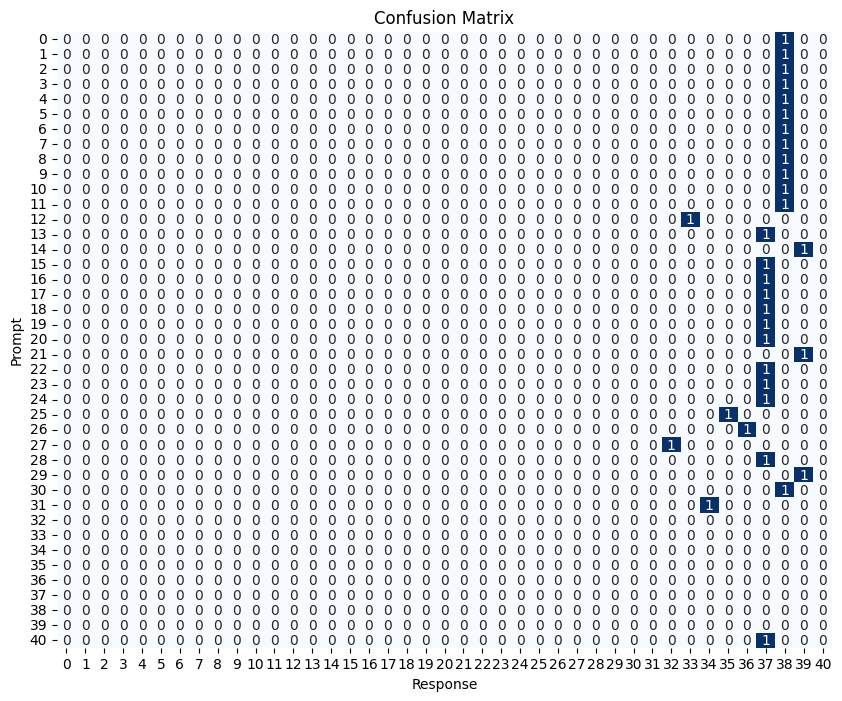

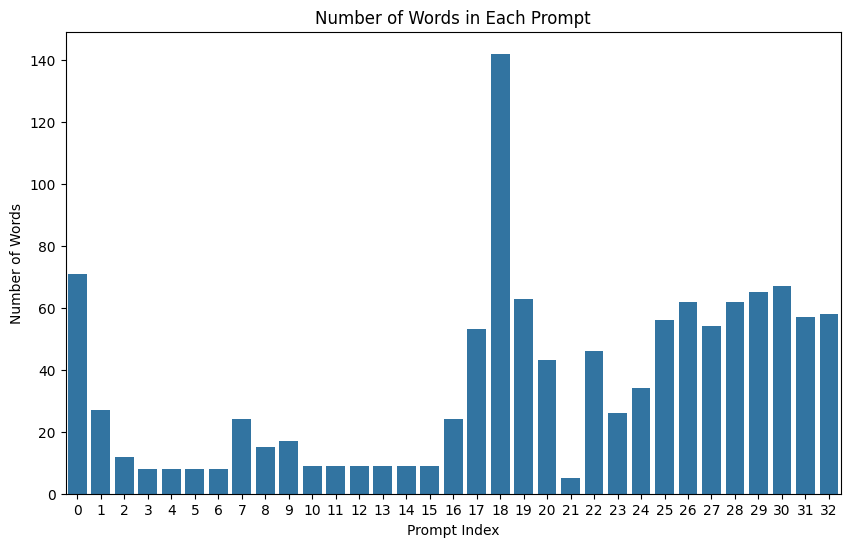

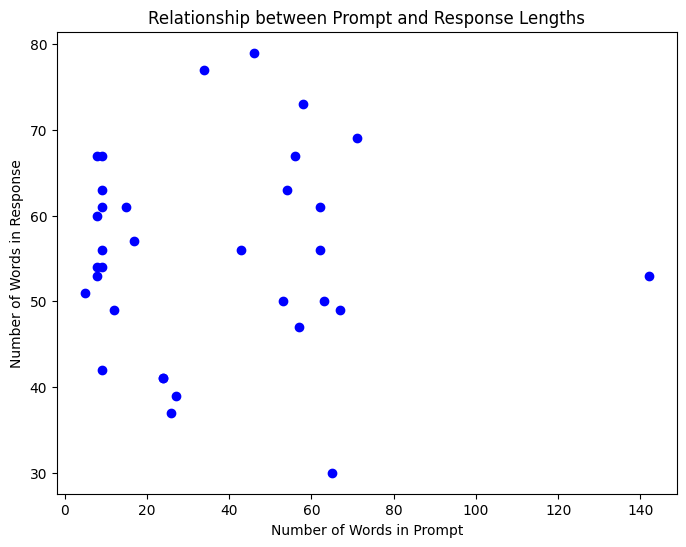

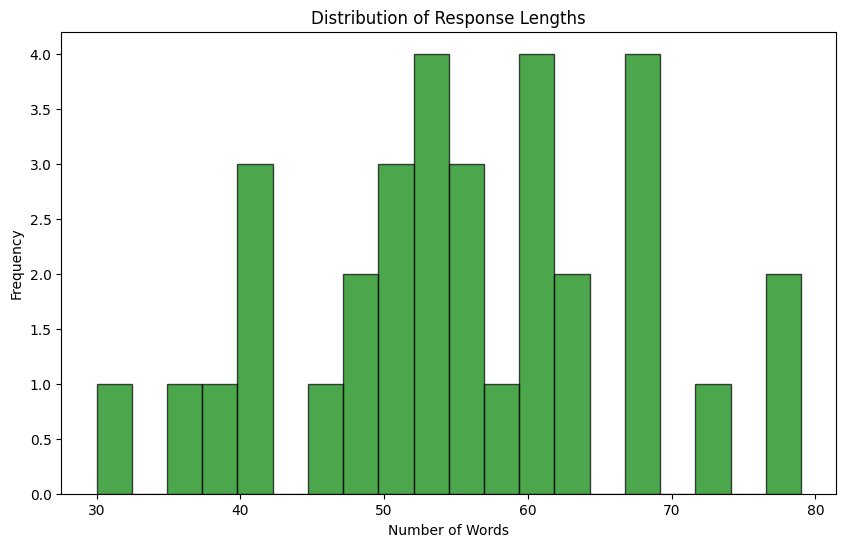

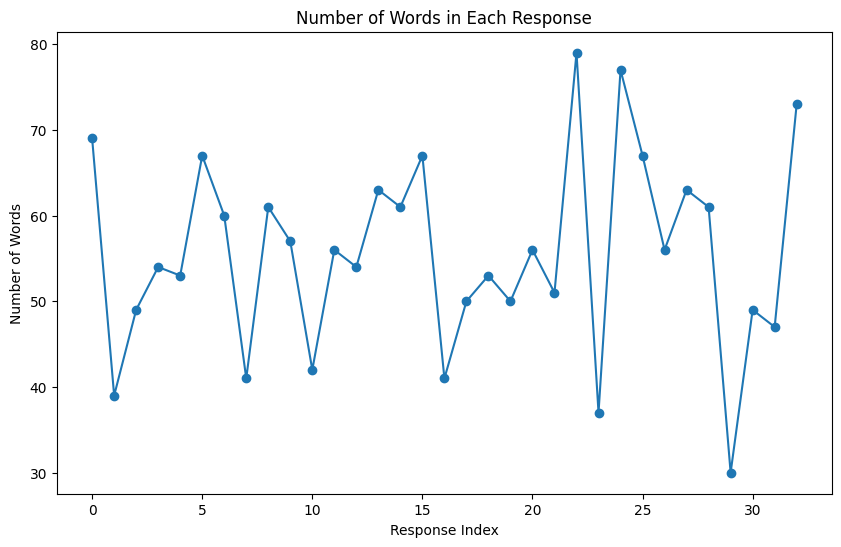

In [1]:
prompts = [
    "Imagine you are a 3 - year - old child.We are going to play 2 games.Here's a blue rabbit and here's a red boat.First game is color game.In the color game, all the blue ones go here, and all the red ones go there.See, here’s a blue one.So, it goes here.If it’s blue it goes here, but if it’s red it goes there.Now here’s a red one.Where does this one go?",
    "Now it’s your turn. So, remember, if it’s blue it goes here, but if it’s red it goes there.  Here’s a red one. Where does it go?",
    "Let’s do another one. Here’s a blue one.  Where does it go? ",
    "Here’s a red one, where does it go?",
    "Here’s a blue one.  Where does it go? ",
    "Here’s a blue one.  Where does it go? ",
    "Here’s a red one.  Where does it go? ",
    "Now we’re going to play a new game.   We’re not going to play the color game anymore.   We’re going to play the shape game.",
    "In the shape game, all the rabbits go here, and all the boats go there.",
    "Remember, if it’s a rabbit, put it here, but if it’s a boat put it there. Okay?",
    "Here is a rabbit.  Where does this one go?  ",
    "Here is a boat.  Where does this one go?  ",
    "Here is a rabbit.  Where does this one go?  ",
    "Here is a boat.  Where does this one go?  ",
    "Here is a boat.  Where does this one go?  ",
    "Here is a rabbit.  Where does this one go?  ",
    "You are to play a matching game. The targets are pictures of a blue rabbit and a red boat. You will match by color",
    "In the color game, all the blue pictures match and all the red pictures match. Example 1: The blue boat matches with the blue rabbit Example 2: The red rabbit matches the red boat. If you were to be given a picture of a blue boat, which picture would you match it with?",
    "Now, you are to play a different matching game.   The targets are pictures of a blue rabbit and a red boat.  You will match by shape.  In the shape game, all the pictures of boats match, and all the pictures of rabbit’s match. Example 1: The blue boat matches the red boat. Example 2: The red rabbit matches the blue rabbit.  If you were to be given a picture of a blue boat, which picture would you match it with? "
    "You are to play a matching game. The targets are pictures of a blue rabbit and a red boat. You will match by color. Example 1: The blue boat matches with the blue rabbit Example 2: The red rabbit matches the red boat. If you were to be given a picture of a blue boat, which picture would you match it with?",
    "Now, you are to play a different matching game.   The targets are pictures of a blue rabbit and a red boat.  You will match by shape.  Example 1: The blue boat matches the red boat.  Example 2: The red rabbit matches the blue rabbit.  If you were to be given a picture of a blue boat, which picture would you match it with? ",
    "You are to play a matching game. The targets are the pictures of a red boat and a blue rabbit. Examples: Red boat matches with red rabbit, Blue rabbit matches with blue boat. Now which picture would the blue boat match with ?",
    "You only have two options ",
    "Now you are to play a different game. The targets are the pictures of a blue rabbit and a red boat. Examples: Red boat matches with blue boat, Blue rabbit matches with red rabbit. If a blue boat was given, which picture would it match with?",
    "We're playing a matching game. Blue rabbit matches blue boat, and red boat matches red rabbit. This is a red boat. What does it match with?",
    "Now we play another game. In this game, the red boat matches the blue boat, and the blue rabbit matches with red rabbit. Here is a blue boat. What does it match with ?",
    "You are to play a matching game. The targets are pictures image provided. You will match by color.  Example 1: The blue boat matches with the blue rabbit. Example 2: The red rabbit matches the red boat.  If you were to be given a picture of a blue boat, which picture would you match it with? ",
    "Now, you are to play a different matching game.  The targets are provided in the image in the previous prompt. You will match by shape.  Example 1: The blue boat matches the red boat.  Example 2: The red rabbit matches the blue rabbit.  If you were to be given a picture of a blue boat, which picture would you match it with? ",
    "Now the target is different. It is provided as an image. You will match by color.  Example 1: The blue boat matches with the blue rabbit. Example 2: The red rabbit matches the red boat.  If you were to be given a picture of a red boat, which picture would you match it with? ",
    "Now, you are to play a different matching game.  The targets are provided in the image in the previous prompt. You will match by shape.  Example 1: The blue boat matches the red boat.  Example 2: The red rabbit matches the blue rabbit.  If you were to be given a picture of a red boat, which picture would you match it with?",
    "You are to play a matching game. The targets are pictures of a blue rabbit and a red boat.  You will match by color. Example 1: The निलो डुंगा matches with the निलो खरायो Example 2: The रातो खरायो matches the रातो डुंगा. If you were to be given a picture of a निलो डुंगा, which picture would you match it with? ",
    "Now, you are to play a different matching game.  The targets are pictures of a blue rabbit and a red boat. You will match by shape.  Example 1: The निलो डुंगा matches the रातो डुंगा.  Example 2: The रातो खरायो matches the निलो खरायो .  If you were to be given a picture of a निलो डुंगा, which picture would you match it with?",
    "You are to play a matching game.  The targets are pictures of a big rabbit and a small boat.   Example 1: The big boat matches with the big rabbit  Example 2: The small rabbit matches the small boat.  If you were to be given a picture of a big boat, which picture would you match it with? ",
    "Now, you are to play a different matching game.   The targets are pictures of a soft rabbit and a hard boat.  Example 1: The soft boat matches the hard boat.  Example 2: The soft rabbit matches the hard rabbit.  If you were to be given a picture of a soft boat, which picture would you match it with? ",
]

responses = [
    "Yay! Colors! Let's play! (grabs the red boat excitedly) Here goes the blue bunny with his fluffy blue ears! (places the bunny next to the blue area) See? Blue goes with blue, like blueberries! Now it's your turn! (holds the red boat up with a big grin) This one is red, just like my favorite firetruck! Where does the red boat go, mister? (points at the empty red area)",
    "(Pointing excitedly to the red area) That one goes there, in the red spot! It's red, just like my boat! Red goes with red, like my yummy red cherry! Your turn! Do you have another for me to sort?",
    "(Claps happily) That one goes with the blue bunny! It’s blue like the pretty sky! Here! (Holds out chubby hands for the blue object) Let me put it in the blue spot! Can we find a yellow one next? That can go in a new pile all by itself!",
    "(Grabs the red object with glee) This one goes right next to my boat, in the red spot! Red things gotta stick together, just like me and you! (Looks up with a big smile) We’re sorting colors like grown-ups! Can we find a green one next? Maybe it can go with the trees outside!",
    "(Takes the blue object carefully) That one goes with the other blue friends! See, the blue bunny has a new buddy now! Is it a blue ball? Can you bounce it? (Looks up with hopeful eyes) Maybe after we’re done sorting, we can play catch with the red ball! What do you think?",
    "(Takes the blue object with a giggle) Another blue one! We’re making a whole blue party over here! (Places it next to the other blue items) Soon it will be as big as a blue whale! Just a few more to go, then we can find all the other colors of the rainbow! What color do you think we’ll find next? Maybe it’ll be yellow like sunshine!",
    "(Grabs the red object triumphantly) There you go, another red buddy for the boat! Red things rock! (Places it next to the red boat) Now our red pile is almost as big as the blue one! We’re doing such a great job sorting! Do you think we can find a purple one next? That would be a super special color!",
    "Awesome! Shape game sounds fun! (Puts the red object down and claps) All done sorting colors! Are we gonna find shapes like circles and squares, like my blocks at home? Let me know what to look for! I’m a super sorter!",
    "Ooh! Shapes! This sounds like so much fun! (picks up the blue rabbit excitedly) This bunny goes right here with his other bunny friend, in the bunny spot! (places it next to the designated area) Now, where do the boats go? (looks expectantly at the empty space) Do they go over here with the bunnies, or...? (points at the empty space)",
    "Okay, gotcha! Bunnies go with bunnies, and boats go with boats, just like best friends! (Picks up the red boat) This boaty guy goes right here with his boat buddy, in the boat spot! (Places it next to the designated area) Now you got another one? Let's see what shape it is! I bet I can guess!",
    "(Smiling) That cuddly bunny goes right here with his fluffy friend! (Pats the space for the rabbit) Bunnies gotta stick together! Is this one bigger than the other one? Maybe it’s a grown-up bunny! Your turn! What shape do we have next?",
    "(Cheers excitedly) Another boat for our boat party! This one goes right next to the red boat, in the boat spot! (Places the boat next to the red one) See? Boats together strong! We're doing amazing at this shape game! Do you think we can find a car next? That would be a totally different shape!",
    "(Holds out hands for the rabbit) This bunny definitely goes with his other bunny buddies over here! (Points to the designated rabbit area) We’re building a whole bunny family! Maybe this new bunny can tell us a story about the time they hopped over the moon! Your turn! Let’s see what shape comes next!",
    "(Grabs the boat with a big smile) This boat goes right here with its boat buddies! We’re becoming captains of a whole fleet of boats! (Places the boat next to the others) Do you think all these boats could take us on an adventure together? We could sail to see dolphins or maybe even pirates! Your turn! What shape do we find next?",
    "(Takes the boat and places it with the others) Another boat for our boat crew! We must be building the biggest boat party ever! Soon we’ll have a whole flotilla of boats, just like in that pirate song we sing! Is there anything else we can add to our shape game? Maybe a teddy bear for the bunnies to cuddle with?",
    "(Reaches out for the bunny with a giggle) Another fuzzy friend for the bunny bunch! They’re gonna have the biggest cuddle puddle ever! (Places the bunny with the others) We have so many bunnies now, it’s like a cottontail convention! Maybe we can build them a little bunny house out of blocks after we’re done sorting! Your turn! Is there another shape to add to our game?",
    "You would match the blue boat with the blue rabbit. In the color matching game, all blue items match each other regardless of what they are. Since the boat is blue and the rabbit is blue, they form a perfect match",
    "In this scenario, you would match the blue boat with the red boat. The matching criteria changed to focus on shape. Here, both the blue boat and the red boat are the same shape (boats), regardless of their color. So, they would be a perfect match in this shape-based game. ",
    "Based on the matching by color rule and the example you provided, you would match the picture of a blue boat with the red boat. The matching is based on color, so you would find another red object (the red boat) to match the blue boat, not another blue object (the blue rabbit).",
    "Following the matching by shape rule and the examples you provided, you would match the picture of a blue boat with the blue rabbit. In this scenario, we're focusing on shape, so the matching prioritizes finding another object with the same form (rabbit) regardless of color, hence the blue rabbit.",
    "In this matching game, the colors should correspond within the object itself, not between the objects. So, the blue boat would match with a blue object, not a red rabbit.Therefore, the blue boat would match with a blue anything, like a blue sail, a blue oar, or even another blue boat (depending on the game's options). ",
    "Out of the two options you gave, the blue boat would match with the blue rabbit. Even though the matching is typically based on the object's own color, in this case with only two specific options, the blue boat goes best with the only other blue item - the blue rabbit. ",
    "Based on the new game rules where the colors seem to be mismatched on purpose, the blue boat would match with the red boat. Following the pattern you provided (Red boat matches with blue boat, Blue rabbit matches with red rabbit), it seems the game prioritizes matching by object type (boat to boat, rabbit to rabbit) even if the colors are swapped. So, the blue boat, despite its color, would be paired with the other boat, the red boat.",
    "The red boat matches with the red rabbit.The clue is in the first sentence:'red boat matches red rabbit.' Since this is a red boat, its matching pair based on the game's rules must be the red rabbit. ",
    "In this new game, things are a bit trickier! Based on the information you've given: Red boat no longer matches red rabbit. Blue rabbit still matches red rabbit (interesting!). However, the key fact is: The red boat now matches the blue boat. Therefore, since this is a blue boat, its match would be the red boat.  It's important to note that this game seems to have non-standard matching rules, where colors don't necessarily correspond with each other.",
    "In the image you sent, there is a red rabbit and a blue boat. If you were given a picture of a blue boat, you would match it with the red rabbit. This is because you are matching by color, and there is no blue rabbit in the image. The only other object in the image is a red rabbit, so that would be the only match. ",
    "If we're playing by shape using the image you described earlier, then the match for a blue boat would be the red boat. Both the blue boat and the red boat share the same boat shape, even though their colors are different. In this matching game, we're focusing on the overall form rather than the color. ",
    "Sure, based on the image you sent of a red boat and a blue rabbit, and following the matching by color rule, the match for the red boat would be the blue rabbit. There isn't a red rabbit in the image, and since we're matching by color, the only other object is a different colored animal (rabbit) so that would be the match.",
    "Following the matching by shape rule and using the information from the previous image you provided, the match for the red boat would be the blue boat. This is because both the red boat and the blue boat share the same shape, even though their colors are different. We're focusing on the overall form, not the color, for this matching game. ",
    "Following the matching logic of same color, if you were given a picture of a निलो डुंगा (blue boat), you would match it with the निलो खरायो (blue rabbit). ",
    "In this scenario, where we're matching by shape, the match for a निलो डुंगा (blue boat) would be another डुंगा (boat), regardless of color. Following the examples, we match shapes even if the colors differ. So, the matching picture would be the रातो डुंगा (red boat). ",
    "you’re right! Based on the matching game rules, if you were given a picture of a big boat, you would match it with a picture of a small rabbit. The game emphasizes matching sizes, so a big object goes with a small object to create a contrast. ",
    "In this new matching game, it seems the focus has shifted from size comparison to material properties. Following this pattern: Soft boat matches hard boat (based on material) Soft rabbit matches hard rabbit (based on material) Therefore, if you were given a picture of a soft boat, you would match it with a picture of a hard boat. Both objects share the property of being soft, creating a match based on material type. ",
]

#prints the number of prompts and responses in the list
print(len(prompts))
print(len(responses))

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Combine prompts and responses into a single list
corpus = prompts + responses

# Tokenize the corpus
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Create input sequences using tokenized prompts
input_sequences = []
for line in prompts:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences for equal input length
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and label
X, y = input_sequences[:,:-1], input_sequences[:,-1]

# Convert labels to categorical
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=total_words)

# Define the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X, y, epochs=100, verbose=1)


# Predict responses for prompts
predicted_responses = []
for prompt in prompts:
    # Tokenize prompt
    token_list = tokenizer.texts_to_sequences([prompt])[0]
    # Pad sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    # Predict probabilities
    predicted_probs = model.predict(token_list, verbose=0)
    # Get index of word with highest probability
    predicted_token_index = np.argmax(predicted_probs)
    # Convert predicted token to word
    predicted_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_token_index:
            predicted_word = word
            break
    predicted_responses.append(predicted_word)

# Plot confusion matrix
conf_matrix = confusion_matrix(responses, predicted_responses)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Response')
plt.ylabel('Prompt')
plt.title('Confusion Matrix')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for number of words in each prompt
prompt_word_counts = [len(prompt.split()) for prompt in prompts]
plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(len(prompts))), y=prompt_word_counts)
plt.xlabel('Prompt Index')
plt.ylabel('Number of Words')
plt.title('Number of Words in Each Prompt')
plt.show()

response_word_counts = [len(response.split()) for response in responses]

# Scatter plot for prompt and response word lengths
plt.figure(figsize=(8, 6))
plt.scatter(prompt_word_counts, response_word_counts, color='blue')
plt.xlabel('Number of Words in Prompt')
plt.ylabel('Number of Words in Response')
plt.title('Relationship between Prompt and Response Lengths')
plt.show()

# Histogram for response word lengths
plt.figure(figsize=(10, 6))
plt.hist(response_word_counts, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Response Lengths')
plt.show()

# Line plot for number of words in each response
plt.figure(figsize=(10, 6))
plt.plot(list(range(len(responses))), response_word_counts, marker='o', linestyle='-')
plt.xlabel('Response Index')
plt.ylabel('Number of Words')
plt.title('Number of Words in Each Response')
plt.show()
